<a href="https://colab.research.google.com/github/Naveen148/Naveen-M/blob/main/chennai_house_sale_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df=pd.read_csv("/content/train-chennai-sale.csv")

In [164]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [165]:
df.shape

(7109, 22)

# **Check for any null elements are present ** 

In [166]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# ***#**Any unique elements are never taken as a feature so we are deleting prt_id**t***

In [167]:
del df['PRT_ID']

In [168]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# **In a same way commoision also cannot be considered as a one of the feature before sale,so we are deleting commision column**

In [169]:
del df['COMMIS']

**bold text**

# **In a same way reg fee also cannot be considered as a one of the feature before sale,so we are deleting  column**

In [170]:
del df['REG_FEE']

In [171]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


# **Non feature elements are deleted and data is ready with feature and target varible**

# **Check for duplicates and drop duplicates if any**

In [172]:
df.drop_duplicates()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [173]:
df.shape

(7109, 19)

# **There is no duplicates as we can see none of the rows delete on drop duplicates**

# **we need to clear the problem of null elements either by drop,bfill or ffill**

In [174]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

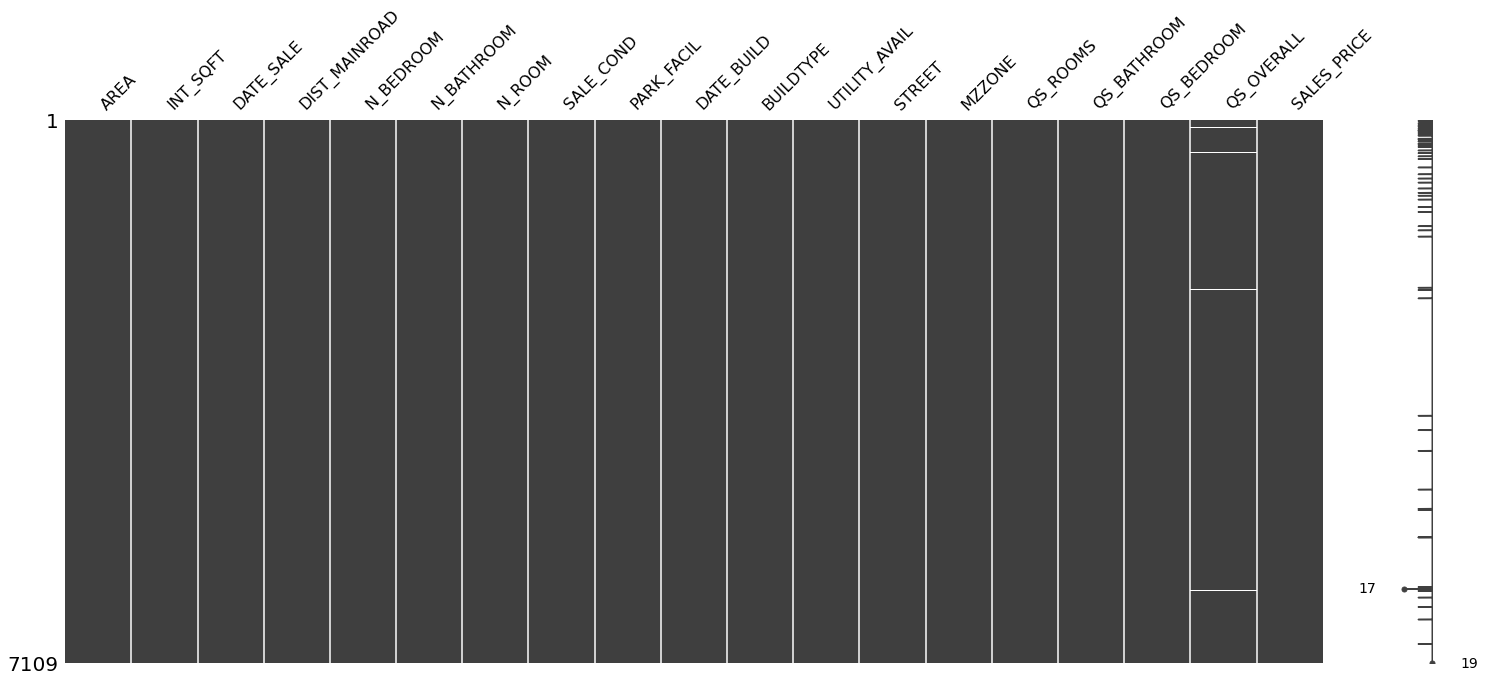

In [175]:
import missingno as msno
msno.matrix(df)
plt.show()

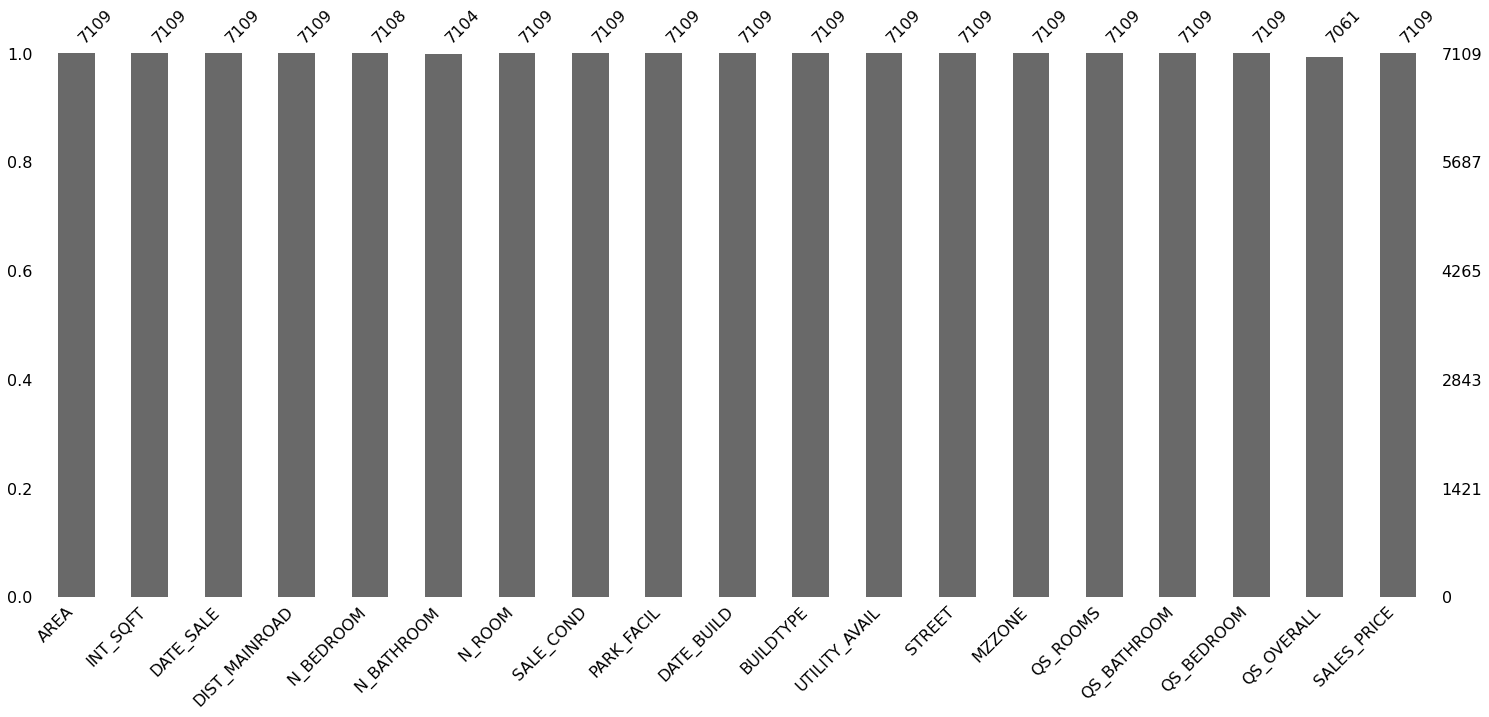

In [176]:
msno.bar(df)

# **we can see QS overall contains 48 null values **

# **same way no of bedroom and bathroom has null values we putting dummies**

In [177]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [178]:
df = df.dropna(subset = ['QS_OVERALL'] )

In [179]:
df = df.dropna(subset = ['N_BEDROOM'] )

In [180]:
df = df.dropna(subset = ['N_BATHROOM'])

In [181]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

# **now we can see that no null values are present in data set**

# **Check for datatypes**

In [182]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

# **we can find age of house and deleted build and sale date columns**

# **Firtsly we need to convert date time to date time types,it is showing object type that is consider itself as tring**

In [183]:
df["DATE_SALE"] = pd.to_datetime(df["DATE_SALE"])
print(df)
print (df.dtypes)

            AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004 2011-04-05            131        1.0         1.0   
1     Anna Nagar      1986 2006-12-19             26        2.0         1.0   
2          Adyar       909 2012-04-02             70        1.0         1.0   
3      Velachery      1855 2010-03-13             14        3.0         2.0   
4     Karapakkam      1226 2009-05-10             84        1.0         1.0   
...          ...       ...        ...            ...        ...         ...   
7104  Karapakkam       598 2011-03-01             51        1.0         1.0   
7105   Velachery      1897 2004-08-04             52        3.0         2.0   
7106   Velachery      1614 2006-08-25            152        2.0         1.0   
7107  Karapakkam       787 2009-03-08             40        1.0         1.0   
7108   Velachery      1896 2005-07-13            156        3.0         2.0   

      N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   

In [184]:
df["DATE_BUILD"] = pd.to_datetime(df["DATE_BUILD"])

In [185]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

In [186]:
df['Age']=df['DATE_SALE']-df['DATE_BUILD']

In [187]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031 days
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015 days
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152 days
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030 days
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802 days


# **we found age now we deleting build and sale date**

In [188]:
del df['DATE_SALE']

In [189]:
del df['DATE_BUILD']

In [190]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031 days
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015 days
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152 days
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030 days
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802 days


In [191]:
df.shape

(7056, 18)

how many areas were present can check through unique values

In [192]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

# **Same way we are checking for all unique values for EDA  exploratory data analysis**

In [193]:
df.N_BEDROOM.unique()

array([1., 2., 3., 4.])

In [194]:
df.N_BATHROOM.unique()

array([1., 2.])

In [195]:
df.N_ROOM.unique()

array([3, 5, 4, 2, 6])

In [196]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [197]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [198]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [199]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [200]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

# **From above we can clearly see that same name is taken in different way  for example paved and pavd is same but pandas detect it as different like this there are lot of errors**

In [201]:
df['SALE_COND'].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [202]:
mappings = {'AdjLand': 'Adj Land', 
            'Adj Land':'Adj Land',
            'Normal Sale': 'Normal Sale',
            'Partial': 'Partial',
            'Partiall': 'Partial',
            'PartiaLl': 'Partial',
            'AbNormal':'AbNormal',
            'Ab Normal':'AbNormal',
            'Family':'Family'}

In [203]:
df['SALE_COND'] = df['SALE_COND'].replace(mappings)
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [204]:
df['BUILDTYPE'].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [205]:
mappings={'Commercial':'Comercial',
          'Others':'Other',
         } 

In [206]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace(mappings)
df['BUILDTYPE'].unique()

array(['Comercial', 'Other', 'House'], dtype=object)

In [207]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [208]:
mappings={'AllPub':'All Pub',
          'NoSeWa':'NoSewr',
          'NoSewr ':'NoSewr'
         } 

In [209]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace(mappings)
df['UTILITY_AVAIL'].unique()

array(['All Pub', 'ELO', 'NoSewr'], dtype=object)

In [210]:
df['STREET'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [211]:
mappings={'Pavd':'Paved',
          'No Access':'NoAccess'}

In [212]:
df['STREET'] = df['STREET'].replace(mappings)
df['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

In [213]:
df.groupby('STREET').median()['SALES_PRICE']

STREET
Gravel      10838880.0
NoAccess     9405400.0
Paved       10470070.0
Name: SALES_PRICE, dtype: float64

In [214]:
df.groupby('UTILITY_AVAIL').median()['SALES_PRICE']

UTILITY_AVAIL
All Pub    10686720.0
ELO         9641790.0
NoSewr     10416015.0
Name: SALES_PRICE, dtype: float64

In [215]:
df.groupby('BUILDTYPE').median()['SALES_PRICE']

BUILDTYPE
Comercial    13355600.0
House         8983700.0
Other         9631875.0
Name: SALES_PRICE, dtype: float64

In [216]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Comercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031 days
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Comercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015 days
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Comercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152 days
3,Velachery,1855,14,3.0,2.0,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030 days
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802 days


In [217]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,1.088801e+07,8866 days 15:02:14.693877504
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,3.769081e+06,4506 days 03:04:44.221060224
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,1430 days 00:00:00
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.266790e+06,5110 days 00:00:00
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.031922e+07,8583 days 00:00:00
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298148e+07,12410 days 00:00:00
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,20368 days 00:00:00


# **we can see that there are no outliers,we can see the same in box plot**

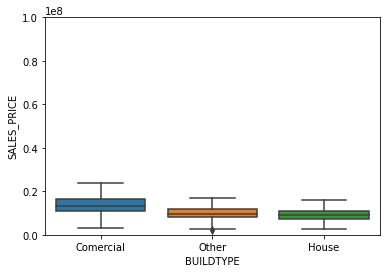

In [218]:
sns.boxplot(x = 'BUILDTYPE', y = 'SALES_PRICE', data = df)
plt.ylim(0, 100000000)
plt.xlabel('BUILDTYPE')
plt.ylabel('SALES_PRICE')
plt.show()

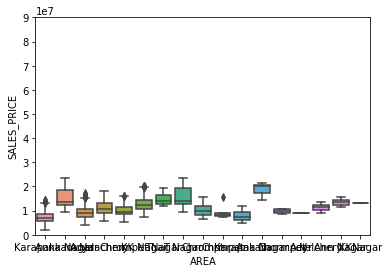

In [219]:
sns.boxplot(x = 'AREA', y = 'SALES_PRICE', data = df)
plt.ylim(0, 90000000)
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

In [220]:
df.dtypes

AREA                      object
INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
SALE_COND                 object
PARK_FACIL                object
BUILDTYPE                 object
UTILITY_AVAIL             object
STREET                    object
MZZONE                    object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
SALES_PRICE                int64
Age              timedelta64[ns]
dtype: object

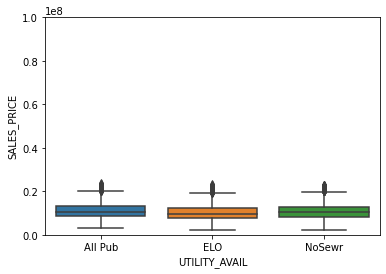

In [221]:
sns.boxplot(x = 'UTILITY_AVAIL', y = 'SALES_PRICE', data = df)
plt.ylim(0, 100000000)
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')
plt.show()

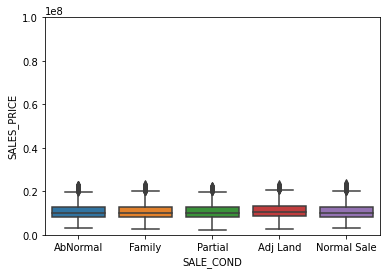

In [222]:
sns.boxplot(x = 'SALE_COND', y = 'SALES_PRICE', data = df)
plt.ylim(0, 100000000)
plt.xlabel('SALE_COND')
plt.ylabel('SALES_PRICE')
plt.show()

# **Exploratory data analysis**

In [223]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,1.088801e+07,8866 days 15:02:14.693877504
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,3.769081e+06,4506 days 03:04:44.221060224
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,1430 days 00:00:00
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.266790e+06,5110 days 00:00:00
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.031922e+07,8583 days 00:00:00
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298148e+07,12410 days 00:00:00
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,20368 days 00:00:00


In [224]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Comercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031 days
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Comercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015 days
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Comercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152 days
3,Velachery,1855,14,3.0,2.0,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030 days
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802 days


# **Age columns contains numerical value with days ,,,so we need to delete days associated with no of days**

In [232]:

df['Age'].dtypes

dtype('<m8[ns]')

In [239]:
df['Age'] = df['Age'].astype('string')

In [240]:
df['Age'] = df['Age'].str.strip("days")

In [241]:
df['Age']

0       1385078400000000000
1        346896000000000000
2        617932800000000000
3        693792000000000000
4        933292800000000000
               ...         
7104    1550188800000000000
7105     276134400000000000
7106     903312000000000000
7107     988675200000000000
7108    1387584000000000000
Name: Age, Length: 7056, dtype: string

In [242]:
df['Age'] = df['Age'].astype('float')

In [243]:
df['Age'].dtypes

dtype('float64')

In [244]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
Age              float64
dtype: object

# **Encoding of data   'Area'  'SALE_COND'  'PARK_FACIL' 'BUILDTYPE''UTILITY_AVAIL''STREET' 'MZZONE' **

# **park facility is a yes or no type thus label encoding**

In [246]:
# Import label encoder
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['PARK_FACIL']= label_encoder.fit_transform(df['PARK_FACIL'])

df['PARK_FACIL'].unique()


array([2, 0, 1])

In [250]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,2,Comercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,1.385078e+18
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,0,Comercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,3.468960e+17
2,Adyar,909,70,1.0,1.0,3,AbNormal,2,Comercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,6.179328e+17
3,Velachery,1855,14,3.0,2.0,5,Family,0,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,6.937920e+17
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,2,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,9.332928e+17


In [251]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['AREA']= label_encoder.fit_transform(df['AREA'])

df['AREA'].unique()

array([12,  4,  0, 15,  7,  9, 14, 13,  8,  6, 11,  2,  5,  1, 16,  3, 10])

In [253]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['BUILDTYPE']= label_encoder.fit_transform(df['BUILDTYPE'])

df['BUILDTYPE'].unique()

array([0, 2, 1])

In [254]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['UTILITY_AVAIL']= label_encoder.fit_transform(df['UTILITY_AVAIL'])

df['UTILITY_AVAIL'].unique()

array([0, 1, 2])

In [255]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['STREET']= label_encoder.fit_transform(df['STREET'])

df['STREET'].unique()

array([2, 0, 1])

In [256]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['MZZONE']= label_encoder.fit_transform(df['MZZONE'])

df['MZZONE'].unique()

array([0, 3, 4, 2, 1, 5])

# **Data is encoded next is finding a co relation of data**

In [263]:
df.corr()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
AREA,1.000000,0.308828,-0.014349,0.327810,0.212191,0.238948,-0.001063,0.006266,-0.009782,0.007231,0.013264,-0.118495,0.003168,-0.000785,0.002576,0.004265,-0.050134,0.167379
INT_SQFT,0.308828,1.000000,0.002267,0.786721,0.517103,0.951305,0.006140,0.004893,-0.008022,0.014684,0.008811,0.142489,0.020495,-0.007249,0.009643,0.013830,0.612668,-0.014026
DIST_MAINROAD,-0.014349,0.002267,1.000000,-0.001938,0.002496,0.002313,0.004424,-0.009654,-0.014579,0.002268,0.010385,0.005935,0.002739,-0.030999,0.001141,-0.017482,0.018062,-0.002876
N_BEDROOM,0.327810,0.786721,-0.001938,1.000000,0.756016,0.840654,0.009452,-0.009624,-0.003843,0.017857,0.003937,0.050957,0.015508,-0.006461,0.015810,0.013932,0.332595,-0.045988
N_BATHROOM,0.212191,0.517103,0.002496,0.756016,1.000000,0.570110,0.002591,-0.014043,-0.003939,0.018322,-0.009846,-0.045138,0.013487,-0.011091,0.012278,0.007858,0.110984,-0.019209
N_ROOM,0.238948,0.951305,0.002313,0.840654,0.570110,1.000000,0.009333,-0.000905,-0.009216,0.015722,0.000377,0.163375,0.016710,-0.006636,0.015618,0.015234,0.603417,-0.034802
SALE_COND,-0.001063,0.006140,0.004424,0.009452,0.002591,0.009333,1.000000,-0.012939,-0.010397,0.003176,0.011703,0.023662,0.004720,-0.013527,-0.005238,-0.007779,-0.030214,-0.011559
PARK_FACIL,0.006266,0.004893,-0.009654,-0.009624,-0.014043,-0.000905,-0.012939,1.000000,-0.007181,0.003667,0.008969,-0.007163,-0.008471,-0.011551,-0.000725,-0.009822,0.146820,-0.009540
BUILDTYPE,-0.009782,-0.008022,-0.014579,-0.003843,-0.003939,-0.009216,-0.010397,-0.007181,1.000000,0.016647,-0.009310,-0.018264,-0.000631,0.009869,-0.001063,0.002775,-0.437383,0.004146
UTILITY_AVAIL,0.007231,0.014684,0.002268,0.017857,0.018322,0.015722,0.003176,0.003667,0.016647,1.000000,0.008035,0.011974,0.006946,0.006285,0.007595,0.010753,-0.023722,-0.000749


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

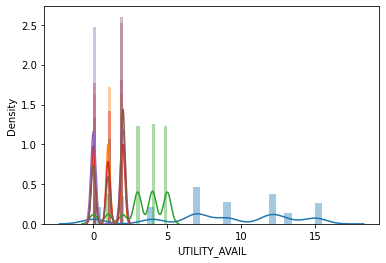

In [267]:
sns.distplot(df["AREA"])
sns.distplot(df['BUILDTYPE'])
sns.distplot(df["MZZONE"])
sns.distplot(df['STREET'])
sns.distplot(df["PARK_FACIL"])
sns.distplot(df['UTILITY_AVAIL'])